Gene set enrichment analysis and comparison of the top scoring networks

Import packages:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from gseapy import enrichr
from gseapy.plot import barplot, dotplot

from pylab import rcParams
rcParams['pdf.fonttype']=42
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['font.size']=10


Load the gene pairs files to be compared. File format: Gene1, Gene2, Score

Gene pairs files can be generated using the notebook 1_Methods_Combos

In [4]:
pairs_list_1=pd.read_csv(r'Ceres_Whitened_PCC_100k.csv',header=0,nrows=17000)
pairs_list_2=pd.read_csv(r'Chronos_Whitened_PCC_100k.csv',header=0,nrows=17000)

print(len(pairs_list_1),len(pairs_list_2))

17000 17000


Get list of unique genes in each list of pairs:

In [5]:
unique_genes_list1=list(set(pairs_list_1['Gene1'].values.tolist() + pairs_list_1['Gene2'].values.tolist()))
unique_genes_list2=list(set(pairs_list_2['Gene1'].values.tolist() + pairs_list_2['Gene2'].values.tolist()))

print(len(unique_genes_list1))
print(len(unique_genes_list2))

9071
8583


Get list of unique genes exclusive to each network: 

In [6]:

exclusive_genes_list1=np.setdiff1d(unique_genes_list1,unique_genes_list2)
exclusive_genes_list2=np.setdiff1d(unique_genes_list2,unique_genes_list1)

print(len(exclusive_genes_list1))
print(len(exclusive_genes_list2))

2379
1891


Get list of unique genes in the intersection of the two networks (genes they have in common):

In [7]:
int_genes=np.intersect1d(unique_genes_list1,unique_genes_list2)
print(len(int_genes))

6692


Create Venn diagram for unique genes in the two networks:

Text(0.5, 1.0, ' Ceres+PCAWhitening Top17K vs Chronos+PCAWhitening Top17K')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


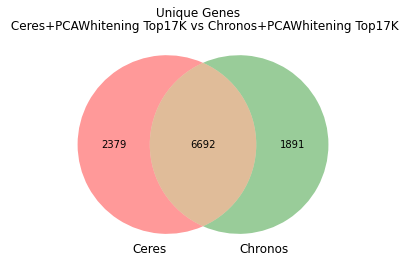

In [8]:
venn2_unweighted(subsets=(len(exclusive_genes_list1),len(exclusive_genes_list2),len(int_genes)),set_labels=('Ceres','Chronos'))
plt.suptitle('Unique Genes')
plt.title(' Ceres+PCAWhitening Top17K vs Chronos+PCAWhitening Top17K')

Combine Gene1_Gene2 in both pairs files in a separate column, to compare edges:

In [17]:
pairs_list_1.sort_values(by='Gene1', inplace=True)
pairs_list_2.sort_values(by='Gene1', inplace=True)

pairs_list_1["Pair"]=pairs_list_1['Gene1']+"_"+pairs_list_1['Gene2']

pairs_list_2["Pair"]=pairs_list_2['Gene1']+"_"+pairs_list_2['Gene2']

int_pairs=np.intersect1d(pairs_list_1['Pair'],pairs_list_2['Pair'])
print(len(int_pairs))
exclusive_numofpairs1=len(pairs_list_1)-len(int_pairs)
print(exclusive_numofpairs1)
exclusive_numofpairs2=len(pairs_list_2)-len(int_pairs)
print(exclusive_numofpairs2)

9358
7642
7642


Create Venn diagram for unique edges in the two networks:

Text(0.5, 1.0, 'Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')

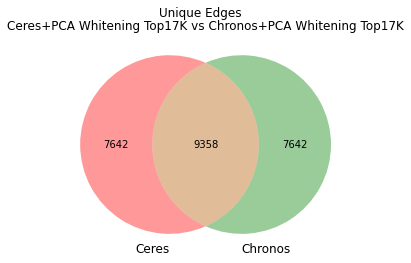

In [18]:
venn2_unweighted(subsets=(exclusive_numofpairs1,exclusive_numofpairs2,len(int_pairs)),set_labels=('Ceres','Chronos'))
plt.suptitle('Unique Edges')
plt.title('Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')


Change type from array to list (required for GSEAPY enrichr function):

In [11]:
int_genes=list(int_genes)
exclusive_genes_list1=list(exclusive_genes_list1)
exclusive_genes_list2=list(exclusive_genes_list2)

Use GSEAPY Enrichr function to calculate enrichment for the network exclusive genes set as well as their intersection, using chosen reference sets:

In [1]:
enrich_1=enrichr(gene_list=exclusive_genes_list1, organism='Human',gene_sets=['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021','KEGG_2021_Human'], format = 'png', outdir='Enrich_1_G')
enrich_2=enrichr(gene_list=exclusive_genes_list2, organism='Human',gene_sets=['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021','KEGG_2021_Human'], format = 'png', outdir='Enrich_2_G')
enrich_int=enrichr(gene_list=int_genes, organism='Human',gene_sets=['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021','KEGG_2021_Human'], format = 'png', outdir='Enrich_int_G')


Plot GSEAPY Enrichr results:

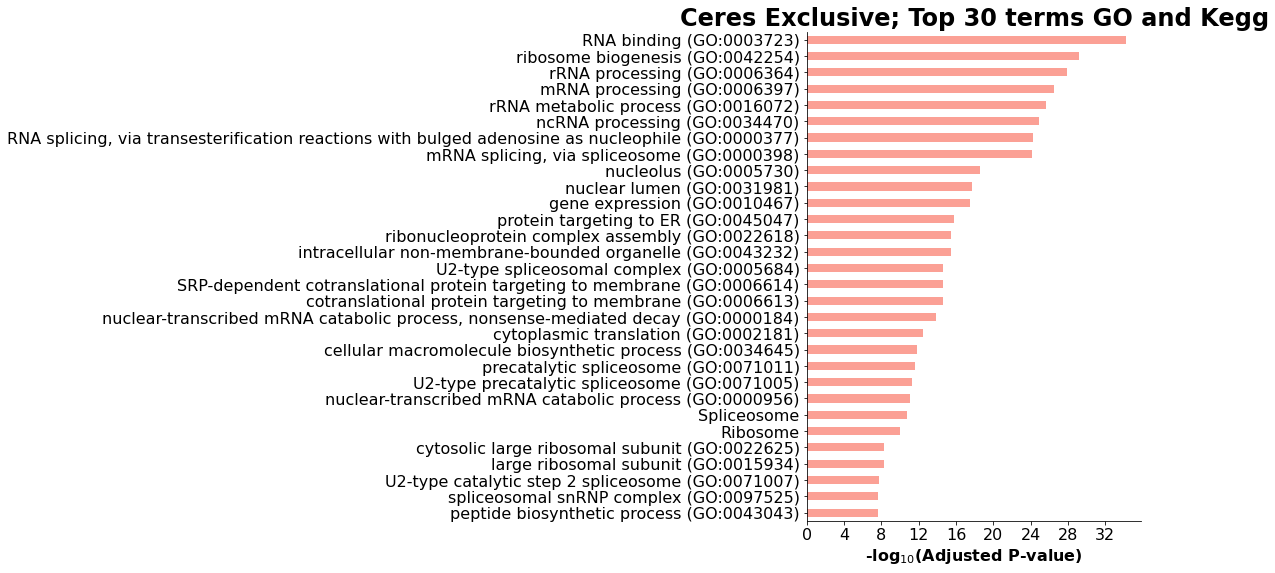

In [25]:
# Top 30 terms
barplot(enrich_1.results, top_term=30, figsize=(6,9), title='Ceres Exclusive; Top 30 terms GO and Kegg' )

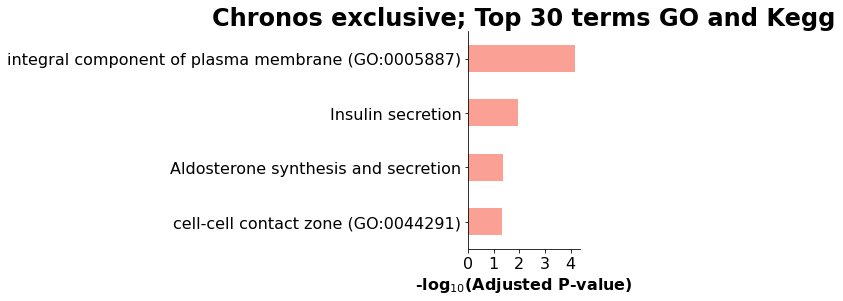

In [20]:
barplot(enrich_2.results, top_term=30, figsize=(2,4),title="Chronos exclusive; Top 30 terms GO and Kegg")

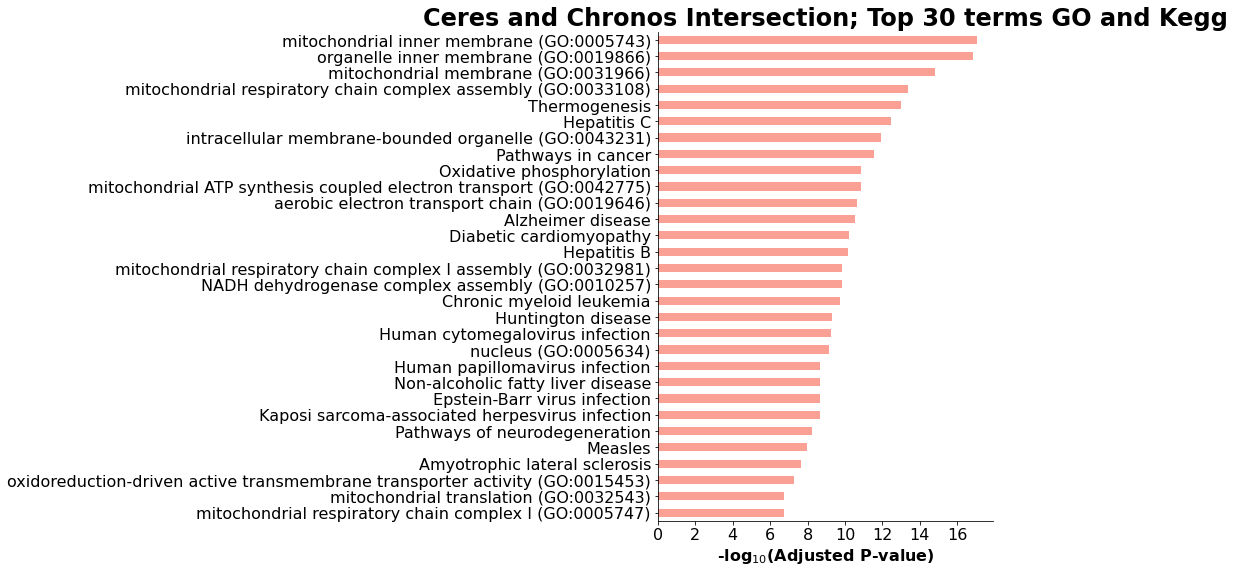

In [21]:
barplot(enrich_int.results,top_term=30,figsize=(6,9), title="Ceres and Chronos Intersection; Top 30 terms GO and Kegg" )

Create a dataframe with the common edges from both networks, and two lists with the gene pairs exclusive to each network:

In [22]:
intersection_1=pairs_list_1[pairs_list_1['Pair'].isin(int_pairs)==True].sort_values(by=['Pair'])
intersection_2=pairs_list_2[pairs_list_2['Pair'].isin(int_pairs)==True].sort_values(by=['Pair'])

exclusivepairs_1=pairs_list_1[pairs_list_1['Pair'].isin(int_pairs)==False]
exclusivepairs_2=pairs_list_2[pairs_list_2['Pair'].isin(int_pairs)==False]

exclusivepairs_1.rename(columns={"PCC":"PCC_1"}, inplace=True)
exclusivepairs_2.rename(columns={"PCC":"PCC_2"}, inplace=True)

intersection_1.rename(columns={"PCC":"PCC_1"}, inplace=True)
intersection_2.rename(columns={"PCC":"PCC_2"}, inplace=True)

intersection_df=pd.merge(intersection_1,intersection_2,on="Pair")
print(intersection_df.head(10))

  Gene1_x  Gene2_x     PCC_1          Pair Gene1_y  Gene2_y     PCC_2
0    A1BG     MZF1  0.196559     A1BG_MZF1    A1BG     MZF1  0.252723
1    A1BG  SLC27A5  0.227883  A1BG_SLC27A5    A1BG  SLC27A5  0.277937
2    A1BG   ZBTB45  0.244040   A1BG_ZBTB45    A1BG   ZBTB45  0.224201
3    A1BG   ZNF132  0.196376   A1BG_ZNF132    A1BG   ZNF132  0.194744
4    A1BG   ZNF497  0.248867   A1BG_ZNF497    A1BG   ZNF497  0.249720
5    AAAS     NDC1  0.467990     AAAS_NDC1    AAAS     NDC1  0.457687
6    AAAS    NUP35  0.288210    AAAS_NUP35    AAAS    NUP35  0.262219
7   AAGAB    AP1B1  0.226853   AAGAB_AP1B1   AAGAB    AP1B1  0.193359
8   AAGAB    AP1G1  0.237442   AAGAB_AP1G1   AAGAB    AP1G1  0.214183
9   AAGAB    AP2S1  0.291226   AAGAB_AP2S1   AAGAB    AP2S1  0.220984


<ipython-input-22-63d4eb9e42d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusivepairs_1.rename(columns={"PCC":"PCC_1"}, inplace=True)
<ipython-input-22-63d4eb9e42d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusivepairs_2.rename(columns={"PCC":"PCC_2"}, inplace=True)


Plot common edges and exclusive edges to each network:

Text(0.5, 1.0, 'Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')

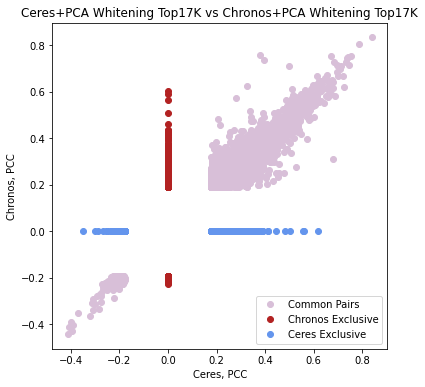

In [24]:
fig, ax= plt.subplots(figsize=(6,6))

plt.plot(intersection_df['PCC_1'],intersection_df['PCC_2'],'s', marker='o',color='thistle',label='Common Pairs')

# on y axis
plt.plot(np.zeros(len(exclusivepairs_2)),exclusivepairs_2['PCC_2'] ,'s', marker='o', color='firebrick',label='Chronos Exclusive')
plt.ylabel('Chronos, PCC')

# on x axis
plt.plot(exclusivepairs_1['PCC_1'],np.zeros(len(exclusivepairs_1)),'s', marker='o',color='cornflowerblue',label='Ceres Exclusive')
plt.xlabel('Ceres, PCC')

plt.legend(loc='lower right')
plt.title('Ceres+PCA Whitening Top17K vs Chronos+PCA Whitening Top17K')
